# Advanced Customer Churn & Lifetime Value Prediction Model

## Part-1: Cleaning

### Step-1: Importing data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Step-2: Checking for null values

In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Step-3: Removing unnecessary columns

In [4]:
df.drop(columns=['customerID'], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Step-4: Checking for binary classes and mapping them to integers

In [5]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
binary_cols = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
binary_map = {'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1}

for col in binary_cols:
    df[col] = df[col].map(binary_map)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### Step-5: Converting TotalCharges column to numeric and handling nan data

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [8]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

### Step-6: Handling Object categorical columns using dummy variables

In [9]:
multiple_cols = df.select_dtypes(include=['object','category']).columns
df = pd.get_dummies(df, columns=multiple_cols, drop_first=True, dtype=int)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


## Part-2: Training

## Classification

### Step-1: Splitting the data and stratifying on y

In [11]:
X_class = df.drop('Churn', axis=1)
y_class = df['Churn']

In [12]:
from sklearn.model_selection import train_test_split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class,y_class,test_size=0.2,random_state=42,stratify=y_class)

### Step-2: Feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler_class = StandardScaler()

In [15]:
X_train_class[['tenure','MonthlyCharges','TotalCharges']] = scaler_class.fit_transform(X_train_class[['tenure','MonthlyCharges','TotalCharges']])
X_test_class[['tenure','MonthlyCharges','TotalCharges']] = scaler_class.transform(X_test_class[['tenure','MonthlyCharges','TotalCharges']])

### Step-3: Model Training

In [16]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [17]:
param_distributions = {
    'n_estimators':range(100,1001,100),
    'learning_rate':np.arange(0.01,0.31,0.05),
    'max_depth':range(3,11),
}

In [18]:
xgb_model_class = xgb.XGBClassifier(random_state=42)
xgb_search_class = RandomizedSearchCV(estimator=xgb_model_class,param_distributions=param_distributions,n_iter=100,cv=5,scoring='roc_auc')

In [19]:
xgb_search_class.fit(X_train_class, y_train_class)

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'learning_rate': array([0.01, ..., 0.21, 0.26]), 'max_depth': range(3, 11), 'n_estimators': range(100, 1001, 100)}"
,n_iter,100
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [20]:
y_pred = xgb_search_class.predict(X_test_class)

In [21]:
xgb_search_class.score(X_test_class,y_test_class)

0.8452866258492856

## Regression

### Step-1: Splitting the data and stratifying on y

In [22]:
X_reg = df.drop('TotalCharges', axis=1)
y_reg = df['TotalCharges']

In [23]:
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg,y_reg,test_size=0.2,random_state=42)

### Step-2: Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler_reg = StandardScaler()

In [26]:
X_train_reg[['tenure','MonthlyCharges']] = scaler_reg.fit_transform(X_train_reg[['tenure','MonthlyCharges']])
X_test_reg[['tenure','MonthlyCharges']] = scaler_reg.transform(X_test_reg[['tenure','MonthlyCharges']])

### Step-3: Model Training

In [27]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

In [28]:
param_distributions = {
    'n_estimators':range(100,1001,100),
    'learning_rate':np.arange(0.01,0.31,0.05),
    'max_depth':range(3,11),
}

In [29]:
xgb_model_reg = xgb.XGBRegressor(random_state=42)
xgb_search_reg = RandomizedSearchCV(estimator=xgb_model_reg,param_distributions=param_distributions,n_iter=100,cv=5,scoring='neg_mean_squared_error')

In [30]:
xgb_search_reg.fit(X_train_reg,y_train_reg)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'learning_rate': array([0.01, ..., 0.21, 0.26]), 'max_depth': range(3, 11), 'n_estimators': range(100, 1001, 100)}"
,n_iter,100
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [31]:
y_pred_reg = xgb_search_reg.predict(X_test_reg)

In [32]:
mean_absolute_error(y_test_reg,y_pred_reg)

52.87576961913708

## Clustering 

### Step-1: Selecting and scaling the features for clustering

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features_for_clustering = ['tenure','MonthlyCharges','TotalCharges']
df_cluster = df[features_for_clustering]

In [34]:
scaler_cluster = StandardScaler()
df_cluster_scaled = scaler_cluster.fit_transform(df_cluster)

### Step-2: Elbow plot to select k

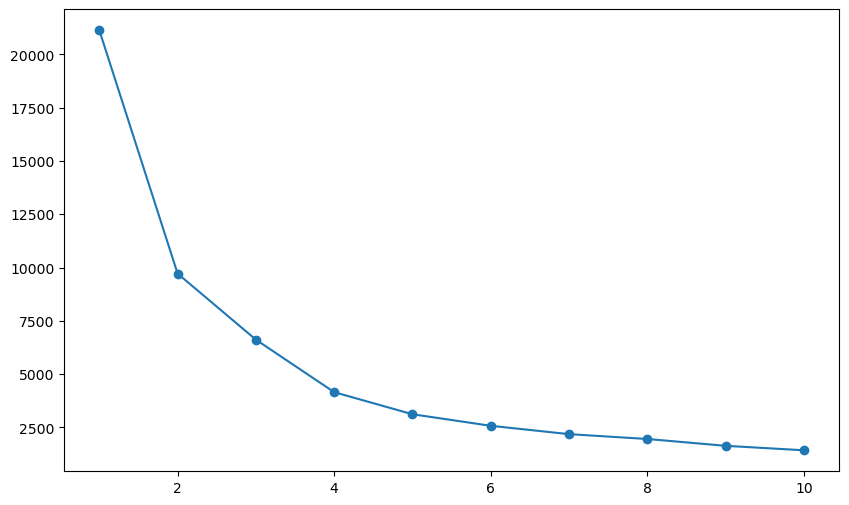

In [35]:
inertia = []
k_range = range(1, 11) 

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_cluster_scaled)
    inertia.append(km.inertia_)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.show()

### Step-3: Model Training

In [36]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans_model.fit(df_cluster_scaled)
df['Cluster'] = kmeans_model.labels_

In [37]:
cluster_analysis = df.groupby('Cluster')[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].mean()

In [38]:
print(cluster_analysis.sort_values(by='TotalCharges', ascending=False))

            tenure  MonthlyCharges  TotalCharges     Churn
Cluster                                                   
1        59.540725       93.312533   5549.892985  0.153967
3        53.585850       34.920147   1836.581320  0.050043
2        15.429324       80.769030   1255.476691  0.482002
0        10.234880       31.754874    311.958311  0.246624


In [39]:
persona_map = {
    1: 'Loyal Champion',
    3: 'High-Value, At-Risk',
    0: 'New & Churn-Prone',
    2: 'Loyal Saver'
}
df['Persona'] = df['Cluster'].map(persona_map)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cluster,Persona
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,1,0,0,New & Churn-Prone
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,1,0,0,0,1,3,"High-Value, At-Risk"
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,1,0,New & Churn-Prone
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,0,0,1,0,0,0,0,3,"High-Value, At-Risk"
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,1,0,2,Loyal Saver


## Part-3: Saving model

In [40]:
import joblib

In [41]:
joblib.dump(xgb_search_class.best_estimator_,'classification_model.joblib')
joblib.dump(scaler_class,'classification_scaler.joblib')

joblib.dump(xgb_search_reg.best_estimator_, 'regression_model.joblib')
joblib.dump(scaler_reg, 'regression_scaler.joblib')

joblib.dump(kmeans_model, 'cluster_model.joblib')
joblib.dump(scaler_cluster, 'cluster_scaler.joblib')

df.to_csv('customer_data_with_personas.csv', index=False)